# Netflix Dataset Analysis
## Introduction
This project conducts a thorough analysis of the content available on Netflix, one of the world’s leading streaming platforms. By exploring various attributes of movies and TV shows, this analysis aims to uncover trends in content offerings, audience preferences, and distribution patterns across different countries and genres. The insights gained from this analysis can enhance our understanding of Netflix's content curation strategies and its influence on global entertainment consumption.
## Dataset Description
The dataset includes the following columns:

* show_id: A unique identifier for each movie or TV show in the dataset.
* type: Indicates whether the content is a "Movie" or "TV Show".
* title: The name of the movie or TV show.
* director: The director(s) of the content.
* cast: A list of the main actors featured in the content.
* country: The country of origin for the movie or TV show.
* date_added: The date when the content was added to Netflix's catalog.
* release_year: The year the movie or TV show was originally released.
* rating: The audience rating, such as PG-13, TV-MA, etc.
* duration: The runtime of the movie in minutes or the number of seasons for TV shows.
* listed_in: The genres or categories to which the content belongs.
* description: A brief synopsis of the content.


###  Importing Libraries and Loading the Dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/Users/meenakshireghu/Downloads/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


###  Data Overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


###  Data Cleaning

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df['date_added'].fillna('Unknown',inplace=True)
df['release_year'].fillna('Unknown',inplace=True)
df['rating'].fillna('Unrating',inplace=True)
df['duration'].fillna('Unknown',inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

### EDA

### Content Type Distribution

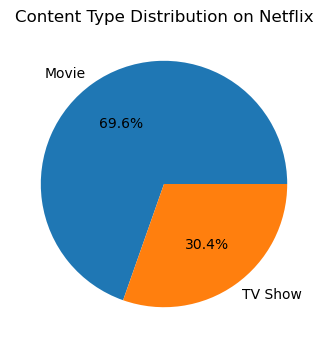

In [61]:
content = df['type'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(content, labels=content.index, autopct='%1.1f%%')
plt.title("Content Type Distribution on Netflix")
plt.show()

### Ratings Distribution

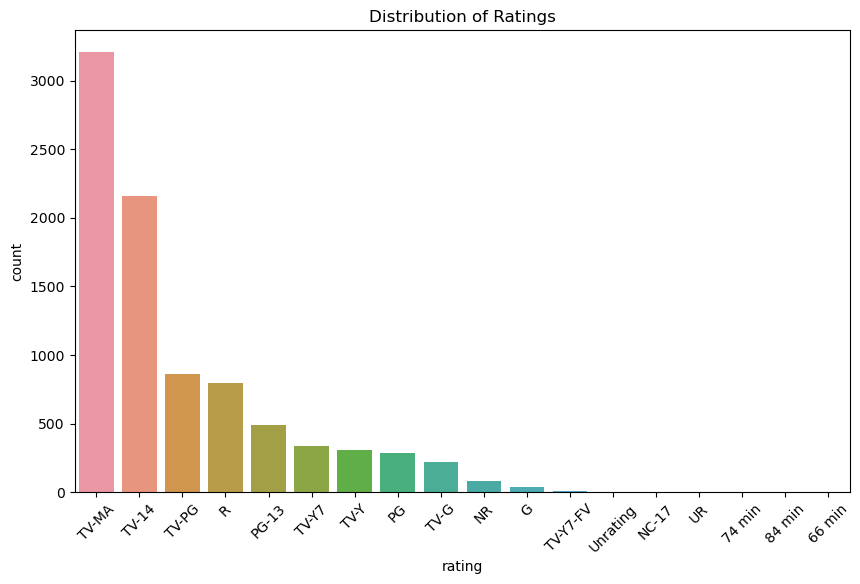

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

### Release Year Distribution

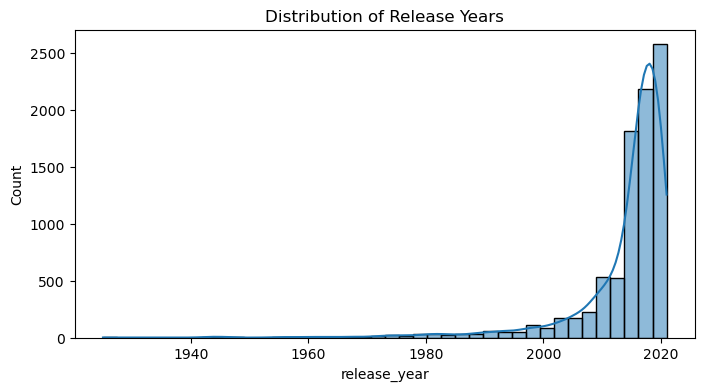

In [68]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='release_year',bins=40,kde=True)
plt.title('Distribution of Release Years')
plt.show()

### Top 10 Countries by Content Type Distribution

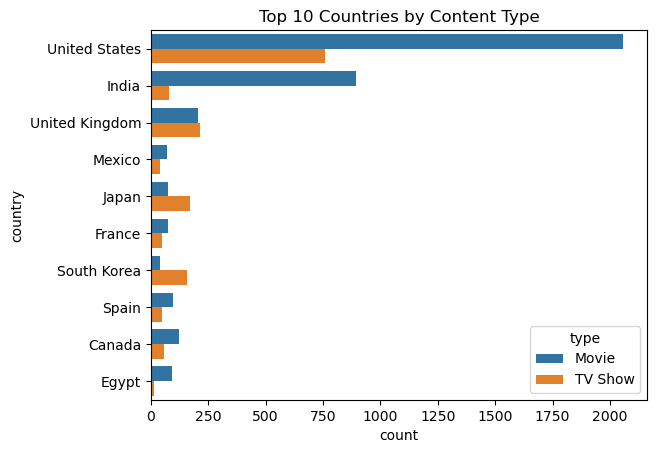

In [67]:
cleaned=df[(df['country']!='Unknown')]
top=cleaned['country'].value_counts().nlargest(10).index
final =cleaned[cleaned['country'].isin(top)]
sns.countplot(data=final,y ='country',hue='type')
plt.title('Top 10 Countries by Content Type')
plt.show()

### Scatter Plot Analysis: Release Year vs. Year Added

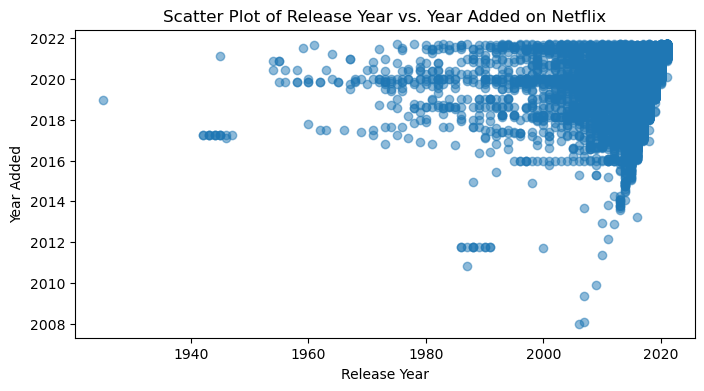

In [72]:
plt.figure(figsize=(8,4))
plt.scatter(df['release_year'], df['date_added'], alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.title('Scatter Plot of Release Year vs. Year Added on Netflix')
plt.show()

### Yearly Content Addition by Type

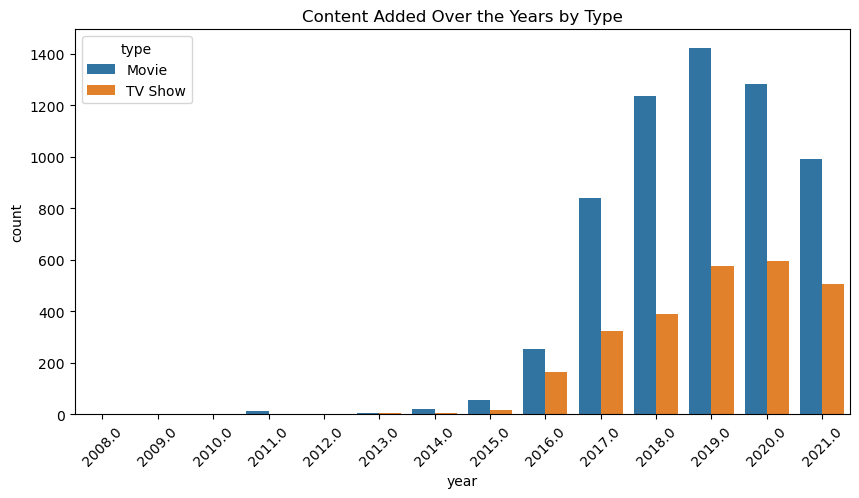

In [13]:
plt.figure(figsize=(10,5))
df['year']=df['date_added'].dt.year
sns.countplot(data=df,x='year',hue='type')
plt.title('Content Added Over the Years by Type')
plt.xticks(rotation=45)
plt.show()

### Top 10 Genres

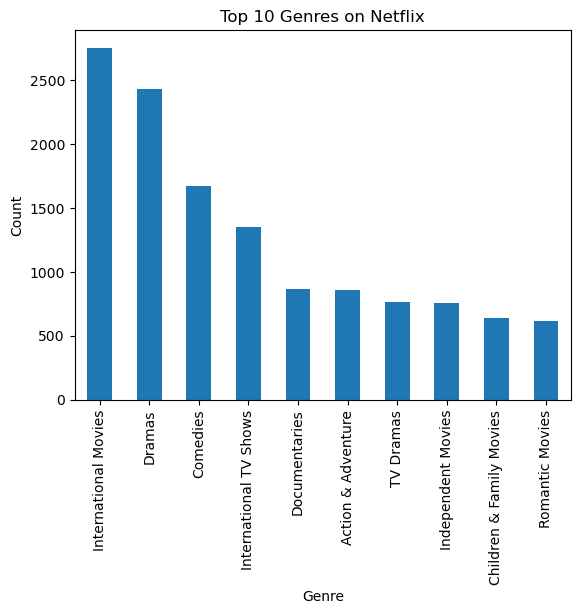

In [77]:
genre = df['listed_in'].str.split(', ').explode().value_counts().head(10)
genre.plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

### Rating Distribution by Content Type

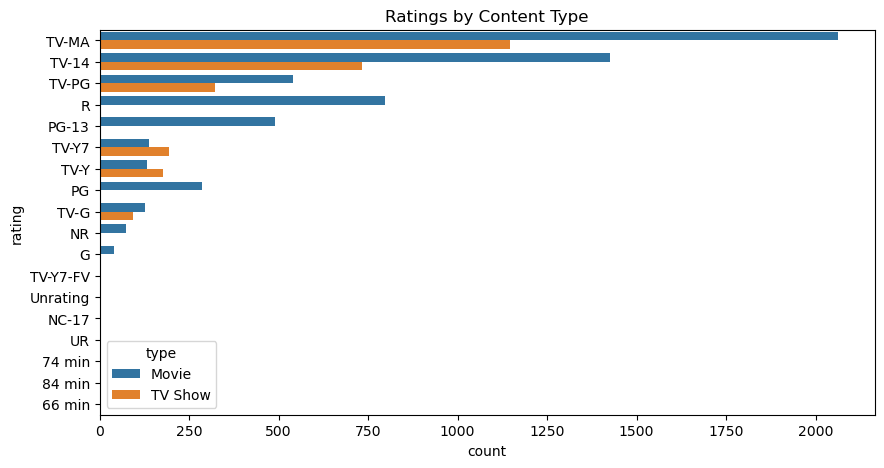

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='rating',hue='type',order=df['rating'].value_counts().index)
plt.title('Ratings by Content Type')
plt.show()

### Top 10 Most Featured Directors on Netflix

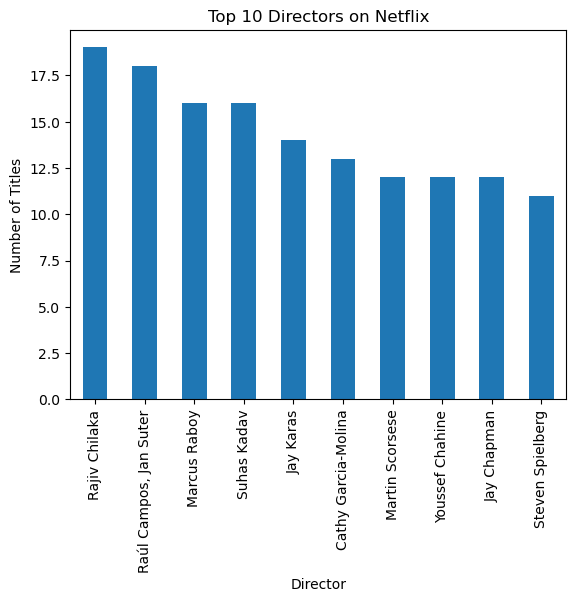

In [64]:
cleaned_director=df[(df['director'] != 'Unknown')]
top_dir= cleaned_director['director'].value_counts().head(10)
top_dir.plot(kind='bar')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.show()

### Content Added Over the Years

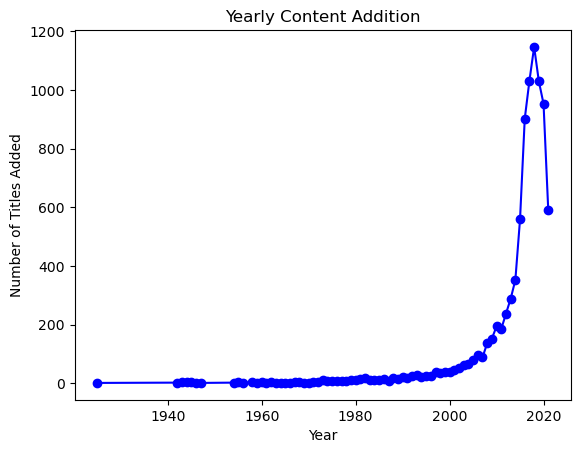

In [63]:
content=df['release_year'].value_counts().sort_index()
content.plot(kind='line', marker='o', color='blue')
plt.title("Yearly Content Addition")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

### Correlation Between Release Year and Date Added on Netflix

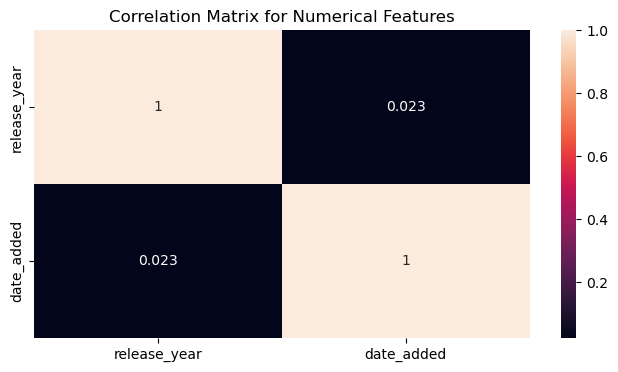

In [62]:
num_df = df[['release_year','date_added']]
plt.figure(figsize=(8,4))
sns.heatmap(num_df.corr(), annot=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()